# Exploratory Data Analysis and Preprocessing
This notebook loads the CFPB complaints dataset, performs EDA, and preprocesses the data for the RAG pipeline.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [5]:
# Load the dataset
df = pd.read_csv('../data/complaints.csv')
df.head(10)

C:\Users\tesfa\AppData\Local\Temp\ipykernel_13564\2056632398.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692
5,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77568,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195711
6,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NV,89107,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195715
7,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,GA,30058,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195718
8,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,CA,92324,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195719
9,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,92324,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195720


## Data Overview
- Number of records
- Columns
- Sample rows

In [6]:
print('Number of records:', len(df))
print('Columns:', df.columns.tolist())
df.sample(5)

Number of records: 9609797
Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3528517,2024-06-06,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,AL,35404,NaN,Consent not provided,Web,2024-06-06,Closed with explanation,Yes,NaN,9183123
2911285,2025-04-15,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MI,48186,NaN,Consent not provided,Web,2025-04-15,Closed with non-monetary relief,Yes,NaN,13003234
665700,2025-03-15,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,93313,NaN,Consent not provided,Web,2025-03-15,Closed with non-monetary relief,Yes,NaN,12495615
6198035,2024-06-04,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,I was tryna by a house and I realized I have f...,NaN,CL Holdings LLC,TX,75241,NaN,Consent provided,Web,2024-06-04,Closed with explanation,Yes,NaN,9177058
5481813,2021-07-22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19130,NaN,NaN,Phone,2021-07-22,Closed with explanation,Yes,NaN,4567745


## Distribution of Complaints by Product

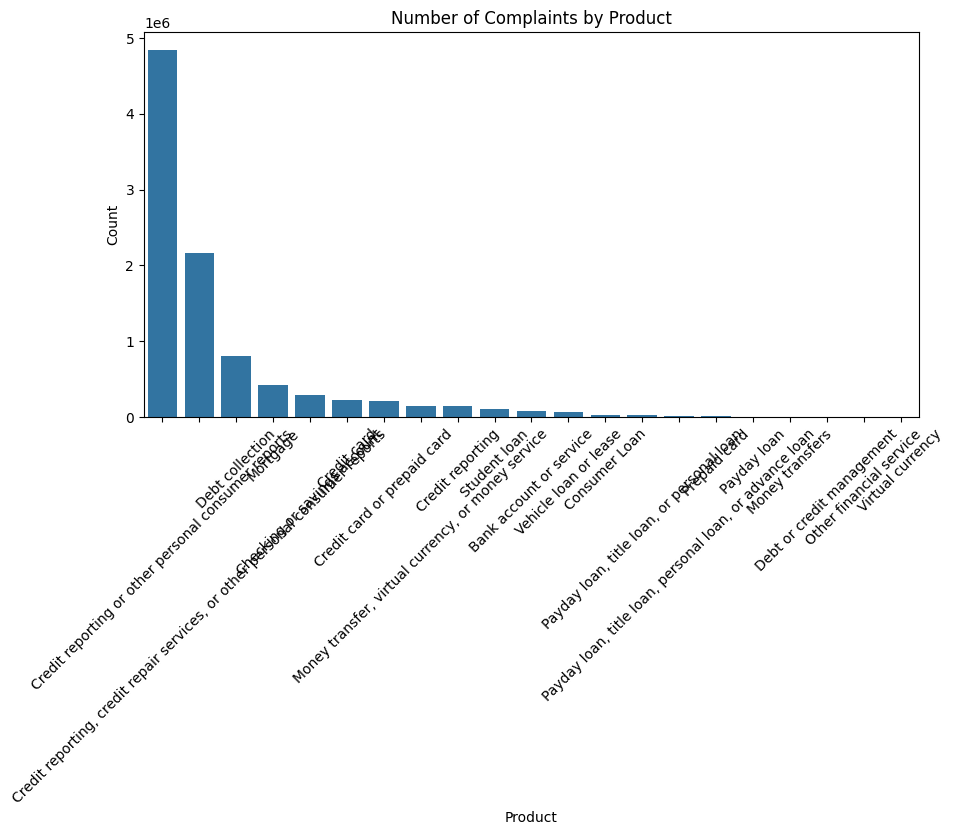

In [7]:
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Number of Complaints by Product')
plt.ylabel('Count')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.show()

## Narrative Length Analysis

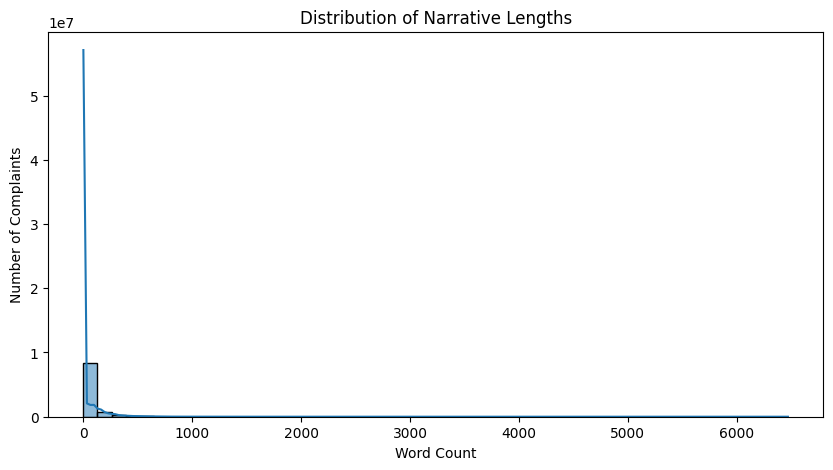

In [8]:
df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Narrative Lengths')
plt.xlabel('Word Count')
plt.ylabel('Number of Complaints')
plt.show()

## Complaints With and Without Narratives

In [9]:
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = df['Consumer complaint narrative'].isnull().sum()
print(f'Complaints with narrative: {with_narrative}')
print(f'Complaints without narrative: {without_narrative}')

Complaints with narrative: 2980756
Complaints without narrative: 6629041


## Filter Dataset for Project Requirements
- Only keep specified products
- Remove empty narratives

In [10]:
products = ['Credit card', 'Personal loan', 'Buy Now, Pay Later', 'Savings account', 'Money transfer']
filtered = df[df['Product'].isin(products)]
filtered = filtered[filtered['Consumer complaint narrative'].notnull() & (filtered['Consumer complaint narrative'].str.strip() != '')]

## Clean Text Narratives

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # keep spaces
    text = re.sub(r'i am writing to file a complaint', '', text)
    text = re.sub(r'\s+', ' ', text).strip()  # replace multiple spaces with one
    return text
filtered['cleaned_narrative'] = filtered['Consumer complaint narrative'].apply(clean_text)
filtered.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length,cleaned_narrative
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91,a xxxx xxxx card was opened under my name by a...
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156,dear cfpb i have a secured credit card with ci...
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233,i have a citi rewards cards the credit balance...
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,454,bi am writing to dispute the following charges...
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,170,although the account had been deemed closed i ...


## Save Cleaned and Filtered Dataset

In [13]:
filtered.to_csv('../data/filtered_complaints.csv', index=False)
print('Filtered dataset saved to ../data/filtered_complaints.csv')

Filtered dataset saved to ../data/filtered_complaints.csv
